## Importing Packages

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import seaborn as sns
from scipy.integrate import simps
from numpy import trapz
from numpy import nan
from scipy.stats import linregress

## Reading ERT Data

In [52]:
ert_data = pd.read_csv("E:/MOOCs/My Projects/Asrikchay/datasets/ert_data.csv", sep=r'\s*,\s*', engine='python')
ert_data.head()

,X,Y,Z,K,V,RES,I(mA),StdDev_V,StdDev_RES,App.res,IP1,IP2,IP3,IP4,IP5,IP_Std1,IP_Std2,IP_Std3,IP_Std4,IP_Std5
0,550185.1400,4518704.391,1123.164887,6492.029306,0.023583,0.031142,757.2738,0.000040,0.000052,202.175714,9.300000,5.707057,4.068331,2.498645,1.458875,0.561781,0.546119,0.382492,0.446982,0.422645
1,550207.6210,4518686.972,1099.754805,-15711.767320,-0.008218,-0.010852,757.2738,0.000014,0.000019,170.497454,8.017087,4.095058,2.360965,0.488923,0.103588,-2.637599,-1.724913,-2.594970,-2.123551,-2.071450
2,550252.5830,4518652.135,1050.600117,55818.186790,0.003434,0.004535,757.2738,0.000009,0.000013,253.111103,7.453202,2.009147,NaN,-0.118020,-1.138526,3.505901,1.762540,NaN,2.008973,1.883040
3,550275.0633,4518634.716,1031.744927,-92629.245790,-0.002500,-0.003301,757.2738,0.000012,0.000015,305.742253,15.799830,6.843742,NaN,3.642464,0.578785,-4.983581,-1.118703,NaN,-2.305323,-1.253840
4,550320.0245,4518599.880,995.976851,187392.875100,0.000661,0.000872,757.2738,0.000008,0.000010,163.475936,21.908940,7.166335,NaN,7.013526,0.917351,11.147520,4.498323,NaN,6.424966,4.478171


X, Y, Z – Coordinates of the measured point.

K –  Geometric factor.  K is a function only of the geometry of the electrode arrangement.

V – Measured Voltage.

RES – Calculated electrical resistivity.

IP1-5 – Induced Polarization is electrical chargeability of subsurface materials.

I (mA) – Electrical current that sent to the ground.

StdDev_V – Standard deviation of voltage.

StdDev_RES - Standard deviation of electrical resistivity.

StdDev_IP - Standard deviation of IP.

App.res – Apparent resistivity is defined as the resistivity of an electrically homogeneous and isotropic half-space that would yield the measured relationship between the applied current and the potential difference for a particular arrangement and spacing of electrodes.

IP_integral – Integral of all IP windows

IP_50th_percentile - 50th percentile of the linear trendline of IP windows

IP_25th_percentile - 25th percentile of the linear trendline of IP windows

IP_75th_percentile - 75th percentile of the linear trendline of IP windows

IP_75th/25th_ratio – Ratio of 75th to 25th percentile of the linear trendline of IP windows

MAX_50th – Difference between MAX value of IP windows trendline and 50th percentile

MIN_50th – Difference between MIN value of IP windows trendline and 50th percentile

IP1 - Median – Difference between IP1 and median of IP1

IP5-Median - Difference between IP5 and median of IP5

IP_std_Integral - Integral of all IP window Standard Deviations

In [53]:
ert_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77520 entries, 0 to 77519
Data columns (total 20 columns):
X             77520 non-null float64
Y             77520 non-null float64
Z             77520 non-null float64
K             77520 non-null float64
V             77520 non-null float64
RES           77520 non-null float64
I(mA)         77520 non-null float64
StdDev_V      77520 non-null float64
StdDev_RES    77520 non-null float64
App.res       77520 non-null float64
IP1           77520 non-null float64
IP2           77520 non-null float64
IP3           65362 non-null float64
IP4           77520 non-null float64
IP5           77520 non-null float64
IP_Std1       77520 non-null float64
IP_Std2       77520 non-null float64
IP_Std3       65362 non-null float64
IP_Std4       77520 non-null float64
IP_Std5       77520 non-null float64
dtypes: float64(20)
memory usage: 11.8 MB


## Calculating Integral of IP windows

In [54]:
IP_windows = ert_data.filter(['IP1','IP2','IP3','IP4','IP5'], axis=1).to_numpy()
IP_windows_mask = np.ma.array(IP_windows, mask=np.isnan(IP_windows))
IP_integral = trapz(IP_windows_mask)

## Calculating Integral of IP Standard Deviation windows

In [55]:
#Extracting IP windows from the main dataset
IP_std_windows = ert_data.filter(['IP_Std1','IP_Std2','IP_Std3','IP_Std4','IP_Std5'], axis=1).to_numpy()
#Masking "nan" values
IP_std_windows_mask = np.ma.array(IP_std_windows, mask=np.isnan(IP_std_windows))
#Calculating Integral (area below plot line)
IP_std_integral = trapz(IP_std_windows_mask)

## Playing with Data

In [56]:
#Some calculations
ert_data['IP1-Median'] = ert_data['IP1'] - ert_data['IP1'].median()
ert_data['IP5-Median'] = ert_data['IP5'] - ert_data['IP5'].median()
ert_data['IP1/IP1-Median_ratio'] = ert_data['IP1'] / ert_data['IP1-Median']
ert_data['IP5/IP5-Median_ratio'] = ert_data['IP5'] / ert_data['IP5-Median']
ert_data['IP1/std1_ratio'] = ert_data['IP1'] / ert_data['IP_Std1']
ert_data['IP5/std5_ratio'] = ert_data['IP5'] / ert_data['IP_Std5']

In [57]:
ert_data.head()

,X,Y,Z,K,V,RES,I(mA),StdDev_V,StdDev_RES,App.res,...,IP_Std2,IP_Std3,IP_Std4,IP_Std5,IP1-Median,IP5-Median,IP1/IP1-Median_ratio,IP5/IP5-Median_ratio,IP1/std1_ratio,IP5/std5_ratio
0,550185.1400,4518704.391,1123.164887,6492.029306,0.023583,0.031142,757.2738,0.000040,0.000052,202.175714,...,0.546119,0.382492,0.446982,0.422645,-5.921490,-1.142982,-1.570551,-1.276376,16.554488,3.451773
1,550207.6210,4518686.972,1099.754805,-15711.767320,-0.008218,-0.010852,757.2738,0.000014,0.000019,170.497454,...,-1.724913,-2.594970,-2.123551,-2.071450,-7.204403,-2.498269,-1.112804,-0.041464,-3.039540,-0.050007
2,550252.5830,4518652.135,1050.600117,55818.186790,0.003434,0.004535,757.2738,0.000009,0.000013,253.111103,...,1.762540,NaN,2.008973,1.883040,-7.768288,-3.740383,-0.959439,0.304388,2.125902,-0.604621
3,550275.0633,4518634.716,1031.744927,-92629.245790,-0.002500,-0.003301,757.2738,0.000012,0.000015,305.742253,...,-1.118703,NaN,-2.305323,-1.253840,0.578340,-2.023072,27.319276,-0.286092,-3.170377,-0.461610
4,550320.0245,4518599.880,995.976851,187392.875100,0.000661,0.000872,757.2738,0.000008,0.000010,163.475936,...,4.498323,NaN,6.424966,4.478171,6.687450,-1.684506,3.276128,-0.544582,1.965364,0.204849


## Linear Regression - Calculating Slope and Intercept

In [58]:
#Dropping "nan" values
IP_remove_nans = [[x for x in y if not np.isnan(x)] for y in IP_windows]

In [59]:
#x axis values 
x_axis = np.array([1 , 2,  3, 4, 5])
x1_axis = np.array([1 , 2,  3, 4])

In [60]:
#Calculating Slope and Intercept of IP Windows trendline
slope=[]
intercept=[]
for i in IP_remove_nans:
    if len(i) == 5:
        linear = linregress(x_axis, i)
        slope.append(linear[0])
        intercept.append(linear[1])
    else:
        linear = linregress(x1_axis, i)
        slope.append(linear[0])
        intercept.append(linear[1])
        

## Calculating Percentiles of Linear Regression Trends

In [61]:
#Calculating 50th, 25th and 75th Percentiles
percentile_50 = []
percentile_25 = []
percentile_75 = []
for num1, num2 in zip(slope, intercept):
    percentile_50.append(num1 * 3 + num2)
    percentile_25.append(num1 * 2 + num2)
    percentile_75.append(num1 * 4 + num2)
    
    

## Adding calculated lists to dataframe

In [62]:
ert_data['slope'] = slope
ert_data['intercept'] = intercept
ert_data['IP_50th_percentile'] = percentile_50
ert_data['IP_25th_percentile'] = percentile_25
ert_data['IP_75th_percentile'] = percentile_75
ert_data['IP_75th/25th_ratio'] = ert_data['IP_75th_percentile']/ert_data['IP_25th_percentile']
ert_data['MAX_50th'] = ert_data['IP1'] - ert_data['IP_50th_percentile']
ert_data['MIN_50th'] = ert_data['IP_50th_percentile'] - ert_data['IP5']
ert_data['IP_integral'] = IP_integral
ert_data['IP_std_integral'] = IP_std_integral
ert_data['IP_integral/IP_std_integral_ratio'] = ert_data['IP_integral']/ert_data['IP_std_integral']


In [63]:
ert_data.head()

,X,Y,Z,K,V,RES,I(mA),StdDev_V,StdDev_RES,App.res,...,intercept,IP_50th_percentile,IP_25th_percentile,IP_75th_percentile,IP_75th/25th_ratio,MAX_50th,MIN_50th,IP_integral,IP_std_integral,IP_integral/IP_std_integral_ratio
0,550185.1400,4518704.391,1123.164887,6492.029306,0.023583,0.031142,757.2738,0.000040,0.000052,202.175714,...,10.273780,4.606582,6.495648,2.717515,0.418359,4.693418,3.147707,17.653471,1.867806,9.451447
1,550207.6210,4518686.972,1099.754805,-15711.767320,-0.008218,-0.010852,757.2738,0.000014,0.000019,170.497454,...,8.843064,3.013124,4.956437,1.069811,0.215843,5.003963,2.909536,11.005283,-8.797959,-1.250891
2,550252.5830,4518652.135,1050.600117,55818.186790,0.003434,0.004535,757.2738,0.000009,0.000013,253.111103,...,9.027039,0.656333,3.446568,-2.133902,-0.619138,6.796869,1.794859,4.102901,4.580227,0.895786
3,550275.0633,4518634.716,1031.744927,-92629.245790,-0.002500,-0.003301,757.2738,0.000012,0.000015,305.742253,...,18.932309,4.272984,9.159426,-0.613457,-0.066975,11.526846,3.694200,13.432410,-4.830723,-2.780621
4,550320.0245,4518599.880,995.976851,187392.875100,0.000661,0.000872,757.2738,0.000008,0.000010,163.475936,...,25.033432,6.095159,12.407917,-0.217598,-0.017537,15.813781,5.177808,18.503076,13.274490,1.393882


## Plots

## IP1 vs Std Dev 1 

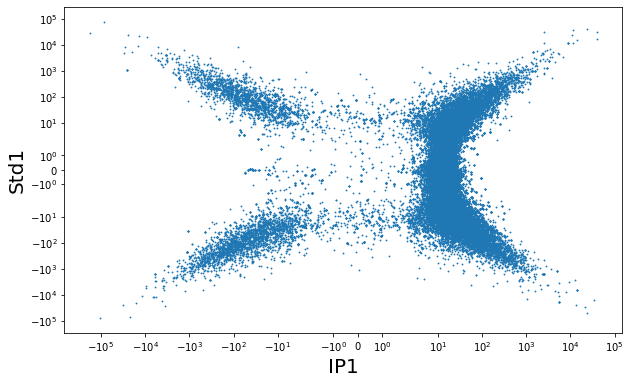

In [64]:
fig1 = plt.figure(figsize=(10, 6))
ax1 = fig1.add_subplot()
ax1.scatter(ert_data["IP1"], ert_data["IP_Std1"],s  = 0.7, alpha=1)
ax1.set_xlabel("IP1", size = 20)
ax1.set_ylabel("Std1", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig1.png")
plt.show()

## IP5 vs Std Dev 5 

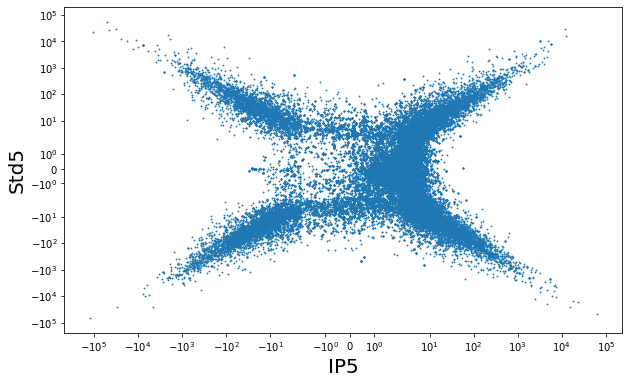

In [65]:
fig2 = plt.figure(figsize=(10, 6))
ax2 = fig2.add_subplot()
ax2.scatter(ert_data["IP5"], ert_data["IP_Std5"],s  = 0.7, alpha=1)
ax2.set_xlabel("IP5", size = 20)
ax2.set_ylabel("Std5", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig2.png")
plt.show()

## RES vs Std Dev RES

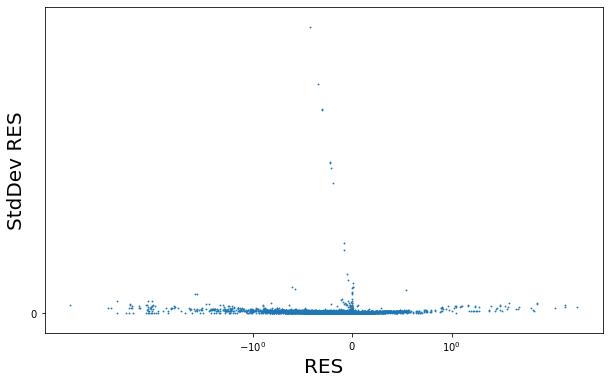

In [66]:
fig3 = plt.figure(figsize=(10, 6))
ax3 = fig3.add_subplot()
ax3.scatter(ert_data["RES"], ert_data["StdDev_RES"],s  = 0.7, alpha=1)
ax3.set_xlabel("RES", size = 20)
ax3.set_ylabel("StdDev RES", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig3.png")
plt.show()

## App RES vs Std Dev RES

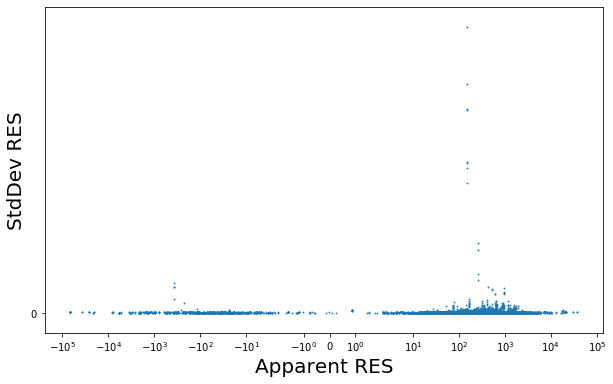

In [67]:
fig4 = plt.figure(figsize=(10, 6))
ax4 = fig4.add_subplot()
ax4.scatter(ert_data["App.res"], ert_data["StdDev_RES"],s  = 0.7, alpha=1)
ax4.set_xlabel("Apparent RES", size = 20)
ax4.set_ylabel("StdDev RES", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig4.png")
plt.show()

## IP1 vs RES

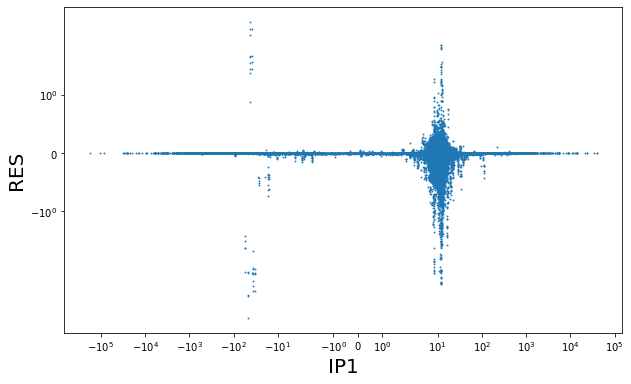

In [68]:
fig5 = plt.figure(figsize=(10, 6))
ax5 = fig5.add_subplot()
ax5.scatter(ert_data["IP1"], ert_data["RES"],s  = 0.7, alpha=1)
ax5.set_xlabel("IP1", size = 20)
ax5.set_ylabel("RES", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig5.png")
plt.show()

## IP1 vs App. RES

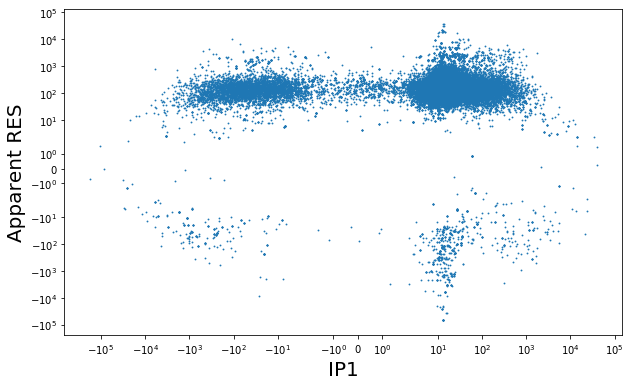

In [69]:
fig6 = plt.figure(figsize=(10, 6))
ax6 = fig6.add_subplot()
ax6.scatter(ert_data["IP1"], ert_data["App.res"],s  = 0.7, alpha=1)
ax6.set_xlabel("IP1", size = 20)
ax6.set_ylabel("Apparent RES", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig6.png")
plt.show()

## RES vs App. RES

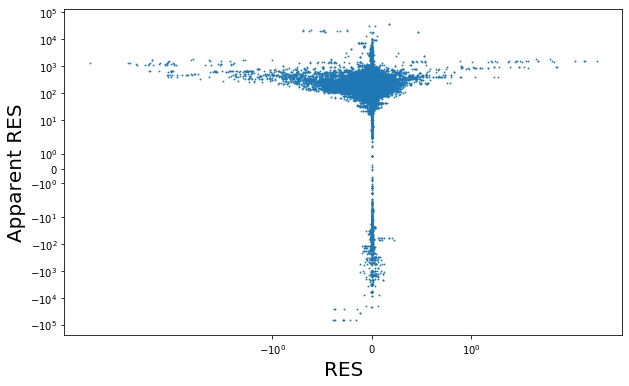

In [70]:
fig7 = plt.figure(figsize=(10, 6))
ax7 = fig7.add_subplot()
ax7.scatter(ert_data["RES"], ert_data["App.res"],s  = 0.7, alpha=1)
ax7.set_xlabel("RES", size = 20)
ax7.set_ylabel("Apparent RES", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig7.png")
plt.show()

## IP Integral vs IP Std. Dev Integral

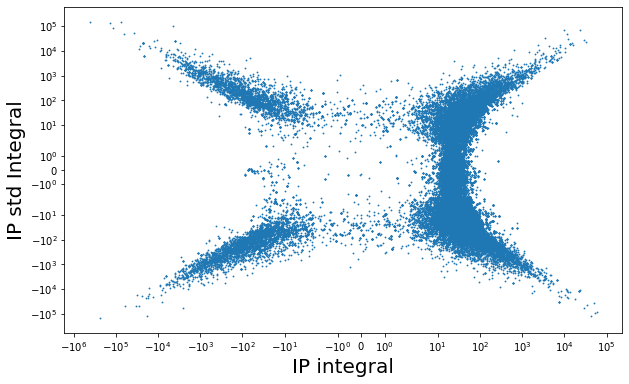

In [71]:
fig8 = plt.figure(figsize=(10, 6))
ax8 = fig8.add_subplot()
ax8.scatter(ert_data["IP_integral"], ert_data["IP_std_integral"],s  = 0.7, alpha=1)
ax8.set_xlabel("IP integral", size = 20)
ax8.set_ylabel("IP std Integral", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig8.png")
plt.show()

## IP 75th Percintile vs IP 25th Percentile

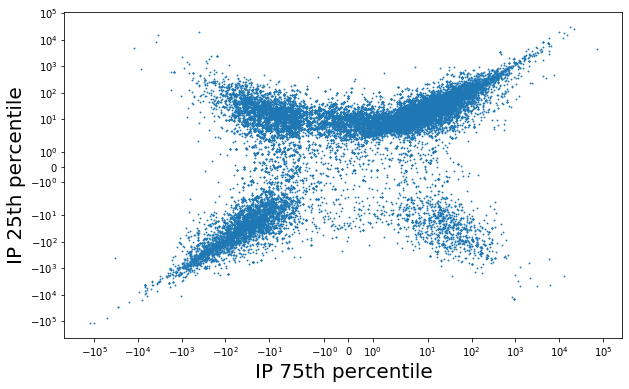

In [72]:
fig9 = plt.figure(figsize=(10, 6))
ax9 = fig9.add_subplot()
ax9.scatter(ert_data["IP_75th_percentile"], ert_data["IP_25th_percentile"],s  = 0.7, alpha=1)
ax9.set_xlabel("IP 75th percentile", size = 20)
ax9.set_ylabel("IP 25th percentile", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig9.png")
plt.show()

## IP 50th Percentile vs MAX & MIN IP Value

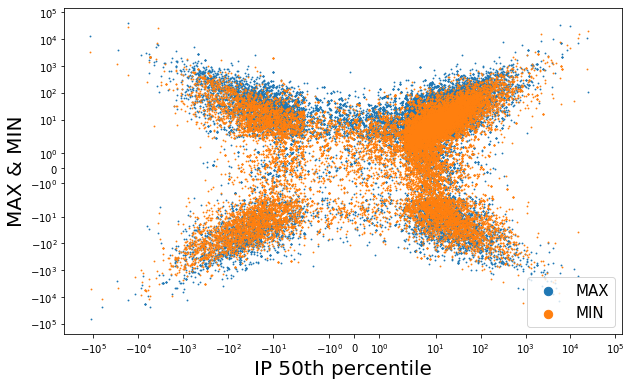

In [74]:
fig10 = plt.figure(figsize=(10, 6))
ax10 = fig10.add_subplot()
ax10.scatter(ert_data["IP_50th_percentile"], ert_data["MAX_50th"],s  = 0.7, alpha=1, label = "MAX")
ax10.scatter(ert_data["IP_50th_percentile"], ert_data["MIN_50th"],s  = 0.7, alpha=1, label = "MIN")
ax10.set_xlabel("IP 50th percentile", size = 20)
ax10.set_ylabel("MAX & MIN", size = 20)
plt.legend(loc='lower right', fontsize = 15,markerscale=10)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig10.png")
plt.show()

## IP1 vs (IP1 vs MEDIAN)

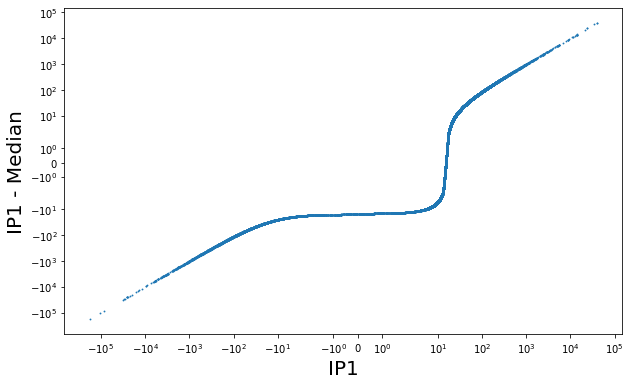

In [76]:
fig11 = plt.figure(figsize=(10, 6))
ax11 = fig11.add_subplot()
ax11.scatter(ert_data["IP1"], ert_data["IP1-Median"],s  = 0.7, alpha=1)
ax11.set_xlabel("IP1", size = 20)
ax11.set_ylabel("IP1 - Median", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig11.png")
plt.show()

## IP5 vs (IP5 vs MEDIAN)

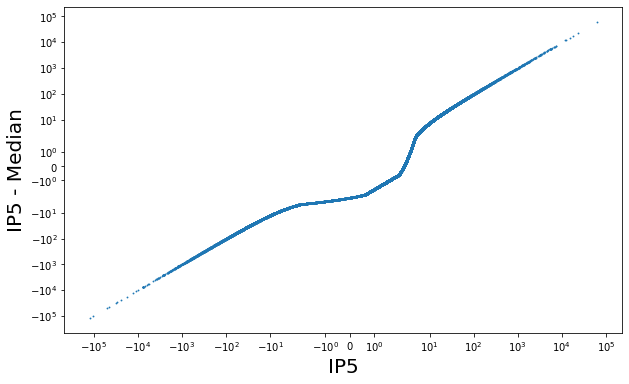

In [77]:
fig12 = plt.figure(figsize=(10, 6))
ax12 = fig12.add_subplot()
ax12.scatter(ert_data["IP5"], ert_data["IP5-Median"],s  = 0.7, alpha=1)
ax12.set_xlabel("IP5", size = 20)
ax12.set_ylabel("IP5 - Median", size = 20)
plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig12.png")
plt.show()

## Histogram of IP 25th, 50th and 75th Percentiles

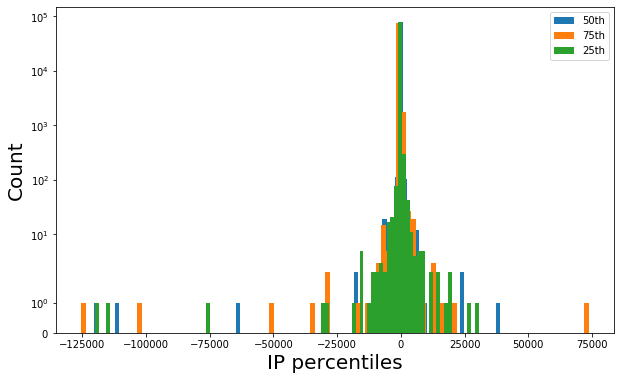

In [78]:
fig13 = plt.figure(figsize=(10, 6))
ax13 = fig13.add_subplot()
ax13.hist(ert_data["IP_50th_percentile"], bins=100, label = "50th")
ax13.hist(ert_data["IP_75th_percentile"], bins=100, label = "75th")
ax13.hist(ert_data["IP_25th_percentile"], bins=100, label = "25th")
ax13.legend(loc = "best")
ax13.set_xlabel("IP percentiles", size = 20)
ax13.set_ylabel("Count", size = 20)
#plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig13.png")
plt.show()


## Histogram of IP MAX_50th and MIN_50th

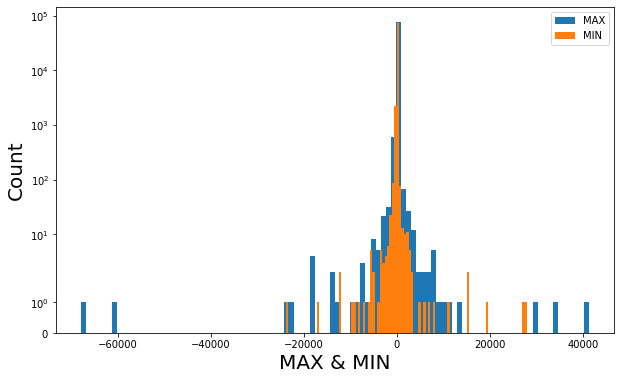

In [80]:
fig14 = plt.figure(figsize=(10, 6))
ax14 = fig14.add_subplot()
ax14.hist(ert_data["MAX_50th"], bins=100, label = "MAX")
ax14.hist(ert_data["MIN_50th"], bins=100, label = "MIN")
ax14.legend(loc = "best")
ax14.set_xlabel("MAX & MIN", size = 20)
ax14.set_ylabel("Count", size = 20)
#plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig14.png")
plt.show()

## Histogram of IP1 and IP5

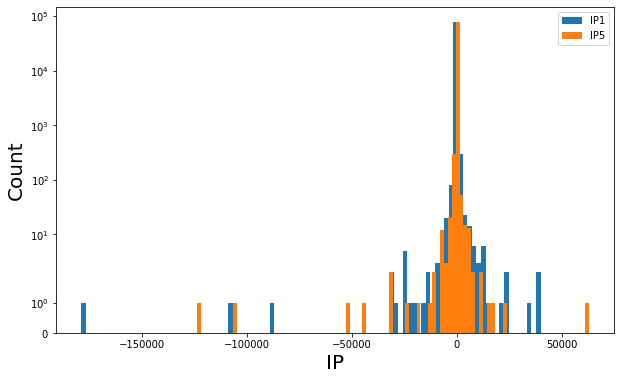

In [82]:
fig15 = plt.figure(figsize=(10, 6))
ax15 = fig15.add_subplot()
ax15.hist(ert_data["IP1"], bins=100, label = "IP1")
ax15.hist(ert_data["IP5"], bins=100, label = "IP5")
ax15.legend(loc = "best")
ax15.set_xlabel("IP", size = 20)
ax15.set_ylabel("Count", size = 20)
#plt.xscale('symlog')
plt.yscale('symlog')
#plt.savefig("fig15.png")
plt.show()

## Reading Borehole Assay Data

In [83]:
assay_data = pd.read_csv("E:/MOOCs/My Projects/Asrikchay/datasets/boreholes_assay_data.csv", sep=r'\s*,\s*', engine='python')
assay_data.head()

,holeid,from,to,length,sampleid,samplingtype,Au_ppm,Ag_ppm,Cu_pr,Zn_pr,Depth,Easting,Northing,Elevation
0,ASDD03,0.0,2.0,2.0,ASDD03-20,CORE,0.025,5.0,0.0321,NaN,0.0,551007.00,4518569.00,977.00
1,ASDD03,2.0,4.0,2.0,ASDD03-21,CORE,0.025,5.0,0.0567,NaN,2.0,551006.85,4518568.48,975.08
2,ASDD03,4.0,6.0,2.0,ASDD03-22,CORE,0.025,5.0,0.0319,NaN,4.0,551006.70,4518567.95,973.15
3,ASDD03,6.0,8.0,2.0,ASDD03-23,CORE,0.025,5.0,0.0302,NaN,6.0,551006.54,4518567.43,971.23
4,ASDD03,8.0,10.0,2.0,ASDD03-24,CORE,0.025,5.0,0.0280,NaN,8.0,551006.39,4518566.91,969.30


## Au and Cu Plots

C:\Users\mirzali.jv\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mirzali.jv\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


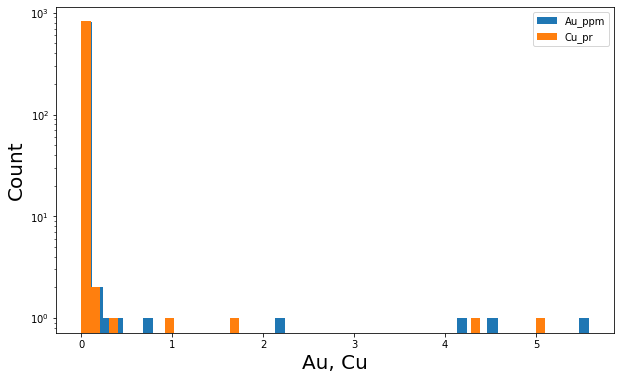

In [84]:
fig16 = plt.figure(figsize=(10, 6))
ax16 = fig16.add_subplot()
ax16.hist(assay_data["Au_ppm"], bins=50, label = "Au_ppm")
ax16.hist(assay_data["Cu_pr"], bins=50, label = "Cu_pr")
ax16.legend(loc = "best")
ax16.set_xlabel("Au, Cu", size = 20)
ax16.set_ylabel("Count", size = 20)
#plt.xscale('symlog')
plt.yscale('log')
#plt.savefig("fig16.png")
plt.show()

## Ag Plot

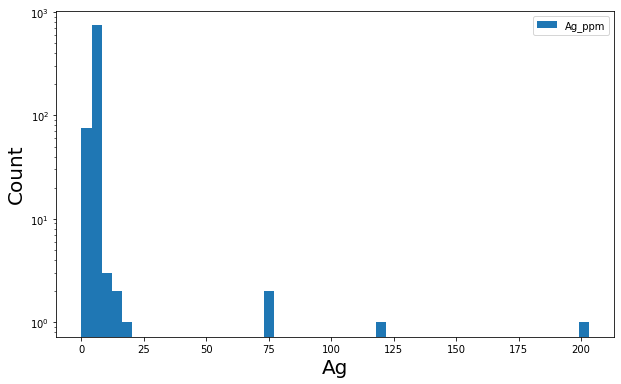

In [87]:
fig17 = plt.figure(figsize=(10, 6))
ax17 = fig17.add_subplot()
ax17.hist(assay_data["Ag_ppm"], bins=50, label = "Ag_ppm")
ax17.legend(loc = "best")
ax17.set_xlabel("Ag", size = 20)
ax17.set_ylabel("Count", size = 20)
#plt.xscale('symlog')
plt.yscale('log')
#plt.savefig("fig17.png")
plt.show()

In [90]:
IP1_abs = abs(ert_data["IP1"])
assay_data.loc[assay_data['Au_ppm'].idxmax()]

holeid               ASDD03
from                 232.15
to                      233
length                 0.85
sampleid          ASDD03-12
samplingtype           CORE
Au_ppm                 5.58
Ag_ppm                  203
Cu_pr                     1
Zn_pr                 11.18
Depth                232.15
Easting              550989
Northing        4.51851e+06
Elevation            753.62
Name: 160, dtype: object

## Visualization of ERT and Assay data on the same plot

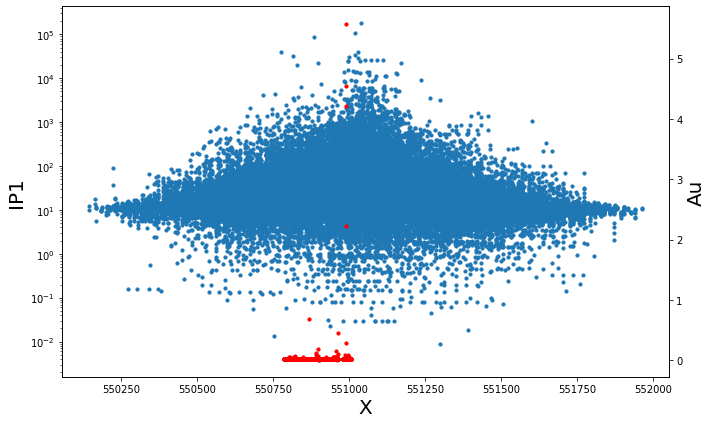

In [92]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(ert_data["X"], IP1_abs, s  = 10, alpha=1, label = "IP1")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Easting"], assay_data["Au_ppm"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_yscale('log')
ax19.set_xlabel("X", size = 20)
ax19.set_ylabel("IP1", size = 20)
ax29.set_ylabel("Au", size = 20)
fig19.tight_layout()
#plt.savefig("Au-IP1-X.png")
plt.show()

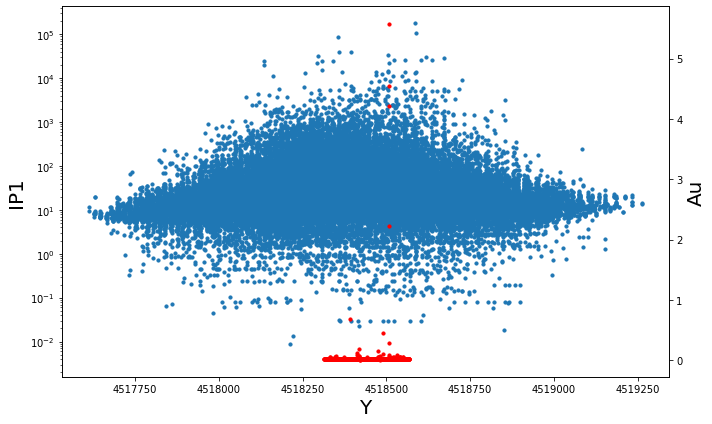

In [93]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(ert_data["Y"], IP1_abs, s  = 10, alpha=1, label = "IP1")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Northing"], assay_data["Au_ppm"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_yscale('log')
ax19.set_xlabel("Y", size = 20)
ax19.set_ylabel("IP1", size = 20)
ax29.set_ylabel("Au", size = 20)
fig19.tight_layout()
#plt.savefig("Au-IP1-Y.png")
plt.show()

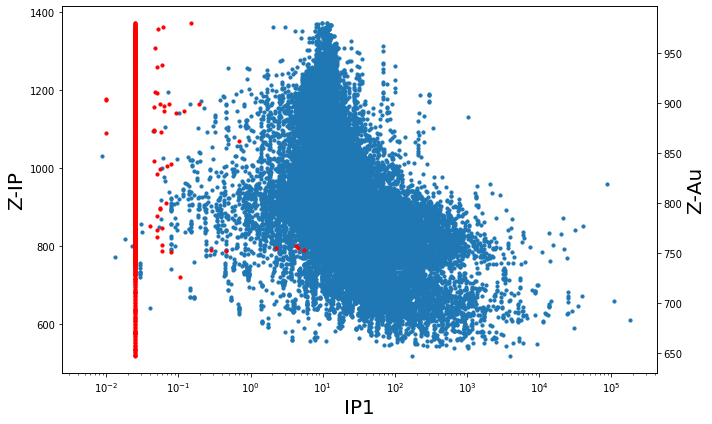

In [95]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(IP1_abs, ert_data["Z"], s  = 10, alpha=1, label = "Z")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Au_ppm"], assay_data["Elevation"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_xscale('log')
ax19.set_ylabel("Z-IP", size = 20)
ax29.set_ylabel("Z-Au", size = 20)
ax19.set_xlabel("IP1", size = 20)
fig19.tight_layout()
#plt.savefig("Au-IP1-Z.png")
plt.show()

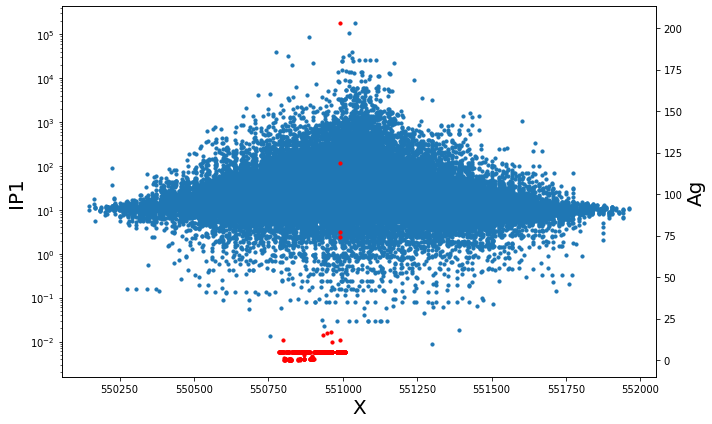

In [96]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(ert_data["X"], IP1_abs, s  = 10, alpha=1, label = "IP1")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Easting"], assay_data["Ag_ppm"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_yscale('log')
ax19.set_xlabel("X", size = 20)
ax19.set_ylabel("IP1", size = 20)
ax29.set_ylabel("Ag", size = 20)
fig19.tight_layout()
#plt.savefig("Ag-IP1-X.png")
plt.show()

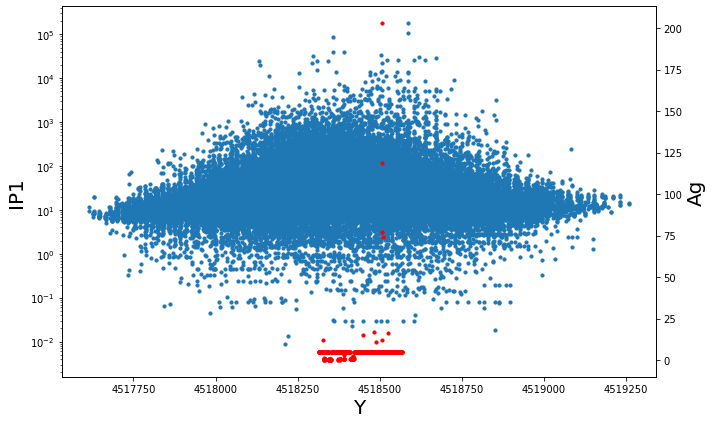

In [97]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(ert_data["Y"], IP1_abs, s  = 10, alpha=1, label = "IP1")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Northing"], assay_data["Ag_ppm"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_yscale('log')
ax19.set_xlabel("Y", size = 20)
ax19.set_ylabel("IP1", size = 20)
ax29.set_ylabel("Ag", size = 20)
fig19.tight_layout()
#plt.savefig("Aug-IP1-Y.png")
plt.show()

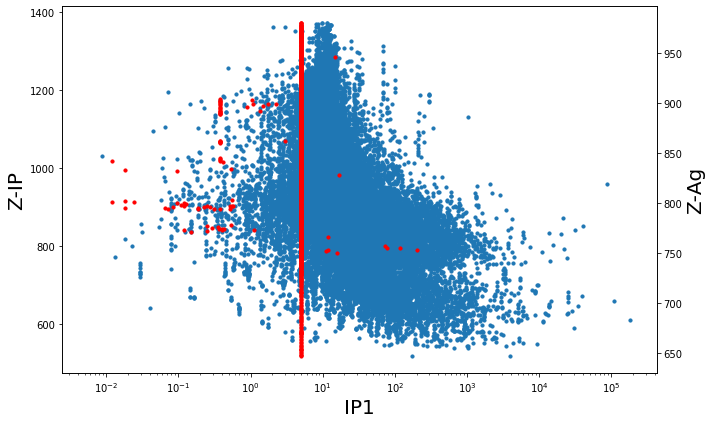

In [98]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(IP1_abs, ert_data["Z"], s  = 10, alpha=1, label = "Z")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Ag_ppm"], assay_data["Elevation"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_xscale('log')
ax19.set_ylabel("Z-IP", size = 20)
ax29.set_ylabel("Z-Ag", size = 20)
ax19.set_xlabel("IP1", size = 20)
fig19.tight_layout()
#plt.savefig("Ag-IP1-Z.png")
plt.show()

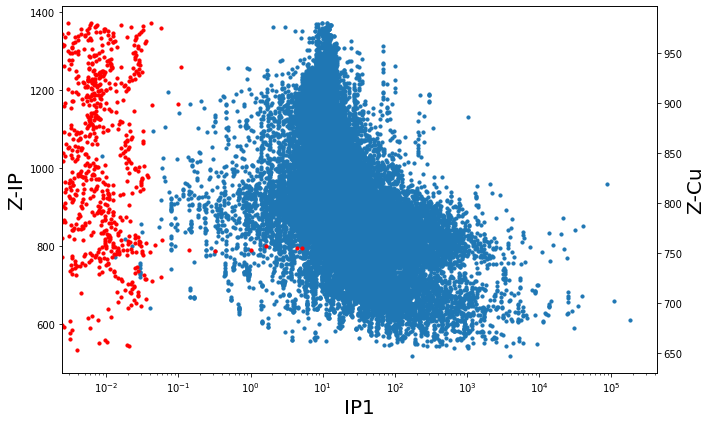

In [100]:
fig19, ax19 = plt.subplots(figsize=(10, 6))

ax19.scatter(IP1_abs, ert_data["Z"], s  = 10, alpha=1, label = "Z")
ax29 = ax19.twinx()  # instantiate a second axes that shares the same x-axis
ax29.scatter(assay_data["Cu_pr"], assay_data["Elevation"],s  = 10, alpha=1, label = "Au", color = "red")
ax19.set_xscale('log')
ax19.set_ylabel("Z-IP", size = 20)
ax29.set_ylabel("Z-Cu", size = 20)
ax19.set_xlabel("IP1", size = 20)
fig19.tight_layout()
#plt.savefig("Cu-IP1-Z.png")
plt.show()


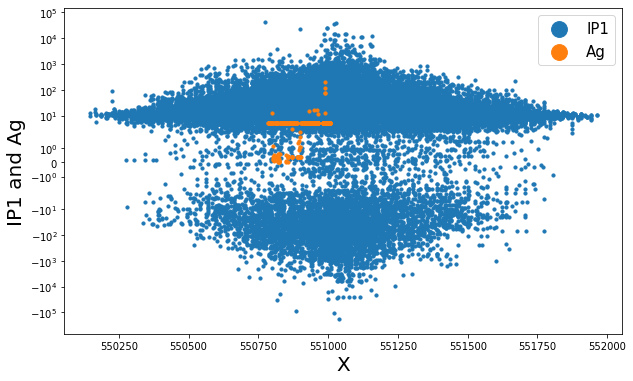

In [101]:
fig20 = plt.figure(figsize=(10, 6))
ax20 = fig20.add_subplot()
ax20.scatter(ert_data["X"], ert_data["IP1"],s  = 10, alpha=1, label = "IP1")
ax20.scatter(assay_data["Easting"], assay_data["Ag_ppm"],s  = 10, alpha=1, label = "Ag")
ax20.set_xlabel("X", size = 20)
ax20.set_ylabel("IP1 and Ag", size = 20)
ax20.legend(loc = "best", fontsize  = 15, markerscale = 5)
#plt.xscale('log')
plt.yscale('symlog')
#plt.savefig("fig20.png")
plt.show()

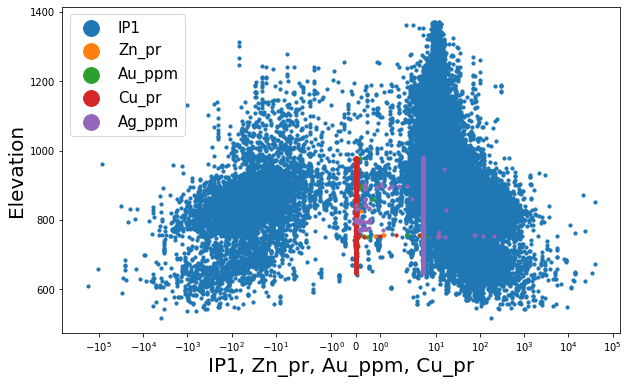

In [102]:
fig23 = plt.figure(figsize=(10, 6))
ax23 = fig23.add_subplot()
ax23.scatter(ert_data["IP1"], ert_data["Z"],s  = 10, alpha=1, label = "IP1")
ax23.scatter(assay_data["Zn_pr"], assay_data["Elevation"],s  = 10, alpha=1, label = "Zn_pr")
ax23.scatter(assay_data["Au_ppm"], assay_data["Elevation"],s  = 10, alpha=1, label = "Au_ppm")
ax23.scatter(assay_data["Cu_pr"], assay_data["Elevation"],s  = 10, alpha=1, label = "Cu_pr")
ax23.scatter(assay_data["Ag_ppm"], assay_data["Elevation"],s  = 10, alpha=1, label = "Ag_ppm")
ax23.set_xlabel("IP1, Zn_pr, Au_ppm, Cu_pr", size = 20)
ax23.set_ylabel("Elevation", size = 20)
ax23.legend(loc = "best", fontsize  = 15, markerscale = 5)
#plt.xscale('log')
plt.xscale('symlog')
#plt.savefig("fig23.png")
plt.show()

## Reading Boreholes Data

In [104]:
boreholes = pd.read_csv("E:/MOOCs/My Projects/Asrikchay/datasets/boreholes_with_depth_coordinates.csv", sep=r'\s*,\s*', engine='python')
boreholes.head()

,holeid,depth,x,y,z
0,ASDD01,0.0,551007.00,4518569.00,977.00
1,ASDD01,3.0,551006.91,4518568.89,974.00
2,ASDD01,6.0,551006.82,4518568.78,971.01
3,ASDD01,9.0,551006.73,4518568.68,968.01
4,ASDD01,12.0,551006.64,4518568.57,965.01


## Finding the nearest ERT data point to each depth value of boreholes

In [122]:
dists = np.sqrt(
    ...:     (ert_data[['X']].to_numpy() - boreholes['x'].to_numpy()) ** 2
    ...:     + (ert_data[['Y']].to_numpy() - boreholes['y'].to_numpy()) ** 2
    ...:     + (ert_data[['Z']].to_numpy() - boreholes['z'].to_numpy()) ** 2
    ...: )

In [123]:
boreholes_no_assay = ert_data.iloc[dists.argmin(axis=0)]
boreholes_no_assay_unique = boreholes_no_assay.drop_duplicates()
boreholes_no_assay_unique

,X,Y,Z,K,V,RES,I(mA),StdDev_V,StdDev_RES,App.res,...,intercept,IP_50th_percentile,IP_25th_percentile,IP_75th_percentile,IP_75th/25th_ratio,MAX_50th,MIN_50th,IP_integral,IP_std_integral,IP_integral/IP_std_integral_ratio
42434,551010.1053,4518589.123,977.986321,3.148286e+05,0.001303,0.003314,393.2903,2.830000e-06,7.190000e-06,78.770424,...,18.071801,7.247189,10.855393,3.638985,0.335224,9.132081,5.441122,27.143277,6.218082,4.365217
43619,551010.1053,4518589.123,971.529355,3.148286e+05,0.000834,0.000841,991.5974,5.610000e-07,5.660000e-07,61.472242,...,21.530564,11.227096,14.661585,7.792607,0.531498,9.439564,4.822992,42.600097,11.322131,3.762551
40593,551021.2985,4518580.068,961.691076,-1.909052e+04,-0.001437,-0.002409,596.6038,1.270000e-06,2.130000e-06,45.996147,...,18.610723,5.200676,9.670692,0.730660,0.075554,7.811424,4.599822,14.871367,-12.349673,-1.204191
40517,551021.2990,4518580.068,958.727362,1.171204e+04,0.001723,0.002184,788.8046,3.620000e-06,4.590000e-06,25.577364,...,18.795414,7.896926,11.529755,4.264096,0.369834,6.635364,5.564425,31.052233,9.714443,3.196502
42695,551021.2985,4518580.068,955.670564,-1.909052e+04,-0.005542,-0.009325,594.3358,1.020000e-05,1.710000e-05,59.629107,...,20.045650,9.039189,12.708010,5.370369,0.422597,7.375131,7.581308,36.259847,-6.095108,-5.949008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77068,550988.8513,4518514.888,735.937434,-5.673091e+05,-0.000804,-0.002169,370.6328,4.660000e-06,1.260000e-05,217.622930,...,27.588293,10.107399,15.934364,4.280435,0.268629,12.677041,11.265511,39.723833,-12.646075,-3.141199
59960,551012.5568,4518506.007,722.617104,3.332518e+06,0.000531,0.000946,561.1815,1.930000e-06,3.440000e-06,195.830450,...,51.943510,23.580028,33.034522,14.125534,0.427599,28.964562,11.805318,85.740490,24.383196,3.516376
63351,551012.5568,4518506.007,720.581355,-3.332518e+06,-0.000376,-0.000894,420.1450,1.210000e-05,2.870000e-05,149.084951,...,34.579195,30.823456,32.075369,29.571543,0.921939,4.022644,-0.630574,62.898825,-53.134650,-1.183763
55297,551011.0575,4518535.315,716.556833,1.132402e+06,0.000231,0.000405,570.8132,1.050000e-05,1.840000e-05,155.583036,...,-62.305954,38.809994,5.104678,72.515310,14.205658,-35.177644,-108.459906,118.598845,220.035630,0.538998


p.s.: This data has been created to use in a geomodelling software